In [290]:
from numpy.linalg import inv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import multivariate_normal

In [27]:
import sklearn
from matplotlib.colors import LogNorm
from sklearn import mixture

In [4]:
sklearn.__version__

'0.18.1'

In [5]:
%matplotlib inline

In [221]:
def estimate_cov(samples, weight, mu):
    w = (samples - mu) * weight
    return w.T.dot(w)/sum(weight)

In [222]:
estimate_cov(np.array([[1,2],[3,4],[5,6]]), np.array([2,3]), np.array([2,2]))

array([[ 8, 16],
       [16, 36]])

In [7]:
def estimate_mean(data, weight):
    return np.sum(data * weight, axis=0) / np.sum(weight)

In [611]:
np.random.seed(110) # for reproducible random results

# set parameters
mu1 = np.array([.0, .0])
mu2 = np.array([1., 1.])
mu3 = np.array([-4., 0.])

cov1 = np.array([[1, 0], [0, 1]])
cov2 = np.array([[0, -.7], [3.5, 7.]])
cov3 = np.array([[1., -0.7], [3.5, 7.]])

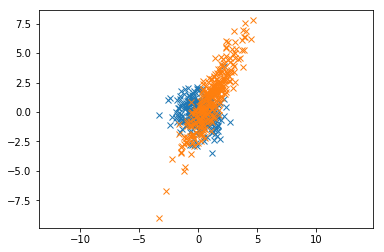

In [612]:
x, y = np.random.multivariate_normal(mu1, cov1, 300).T
plt.plot(x, y, 'x')
X = x
Y = y

x, y = np.random.multivariate_normal(mu2, cov2, 300).T
plt.plot(x, y, 'x')
X = np.concatenate([X,x])
Y = np.concatenate([Y,y])

#x, y = np.random.multivariate_normal(mu3, cov3, 300).T
#plt.plot(x, y, 'x')
#X = np.concatenate([X,x])
#Y = np.concatenate([Y,y])

plt.axis('equal')
plt.show()

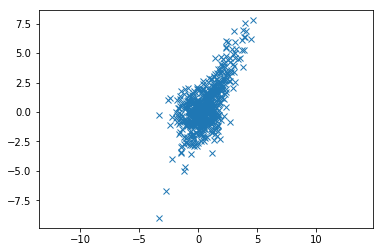

In [613]:
plt.plot(X, Y, 'x')
plt.axis('equal')
plt.show()

In [614]:
Z = np.concatenate((X.reshape(-1,1), Y.reshape(-1,1)), axis=1)
print Z.shape
Z[:5]

(600L, 2L)


array([[ 0.3285971 , -0.79619855],
       [ 1.40312383, -1.54779275],
       [ 1.1667303 ,  1.14772265],
       [ 0.13010933,  0.43142236],
       [-0.86831976,  0.02715937]])

In [615]:
mu1_guess  = np.array([-2, 4])
cov1_guess = np.array([[2, 0], [0, 1.5]])

mu2_guess  = np.array([4, -3])
cov2_guess = np.array([[1.5, 0], [0, 4]])

mu3_guess  = np.array([0, 0])
cov3_guess = np.array([[1, 0], [0, 1]])

---

In [616]:
likelihood1 = multivariate_normal(mu1_guess, cov1_guess).pdf(Z)
likelihood2 = multivariate_normal(mu2_guess, cov2_guess).pdf(Z)
#likelihood3 = multivariate_normal(mu3_guess, cov3_guess).pdf(Z)

In [ ]:
xmin, xmax = min(Z[:,0]), max(Z[:,0])
ymin, ymax = min(Z[:,1]), max(Z[:,1])

x, y = np.mgrid[xmin:xmax:.01, ymin:ymax:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

rv = multivariate_normal(mu1_guess, cov1_guess)
rv2 = multivariate_normal(mu2_guess, cov2_guess)
#rv3 = multivariate_normal(mu3_guess, cov3_guess)

plt.scatter(Z[:,0], Z[:,1], s=.8)
plt.contour(x, y, rv2.pdf(pos), alpha=.5)
#plt.contour(x, y, rv3.pdf(pos), alpha=.5)
plt.contour(x, y, rv.pdf(pos), alpha=.5)

In [620]:
likelihood_total = likelihood1 + likelihood2

weight1 = (likelihood1 / likelihood_total).reshape(-1,1)
weight2 = (likelihood2 / likelihood_total).reshape(-1,1)

In [621]:
# new estimates for standard deviation
cov1_guess = estimate_cov(Z, weight1, mu1_guess)
cov2_guess = estimate_cov(Z, weight2, mu2_guess)

In [622]:
# new estimates for mean
mu1_guess = estimate_mean(Z, weight1)
mu2_guess = estimate_mean(Z, weight2)
print mu1_guess, mu2_guess

[ 0.41312685  1.39560413] [ 0.67047851 -0.37721651]


In [623]:
for _ in range(1000):
    likelihood1 = multivariate_normal(mu1_guess, cov1_guess).pdf(Z)
    likelihood2 = multivariate_normal(mu2_guess, cov2_guess).pdf(Z)

    likelihood_total = likelihood1 + likelihood2 
    weight1 = (likelihood1 / likelihood_total).reshape(-1,1)
    weight2 = (likelihood2 / likelihood_total).reshape(-1,1)
    

    cov1_guess = estimate_cov(Z, weight1, mu1_guess)
    cov2_guess = estimate_cov(Z, weight2, mu2_guess)
    

    mu1_guess = estimate_mean(Z, weight1)
    mu2_guess = estimate_mean(Z, weight2)